<a href="https://colab.research.google.com/github/mannat244/ML_Lab/blob/main/ML_Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LSE Solution
a = -4.749999999999995 b = 4.15
RMSE = 2.5729360660537224

Ridge (c = 3.814697265625e-06)
a = -4.749983072335419 b = 4.149997339256982
RMSE = 2.572936066067279

Ridge (c = 7.62939453125e-06)
a = -4.749966144779943 b = 4.149994678530618
RMSE = 2.572936066107955

Ridge (c = 1.52587890625e-05)
a = -4.749932289996217 b = 4.149989357127836
RMSE = 2.5729360662706506

Ridge (c = 3.0517578125e-05)
a = -4.749864581737702 b = 4.149978714522077
RMSE = 2.572936066921415


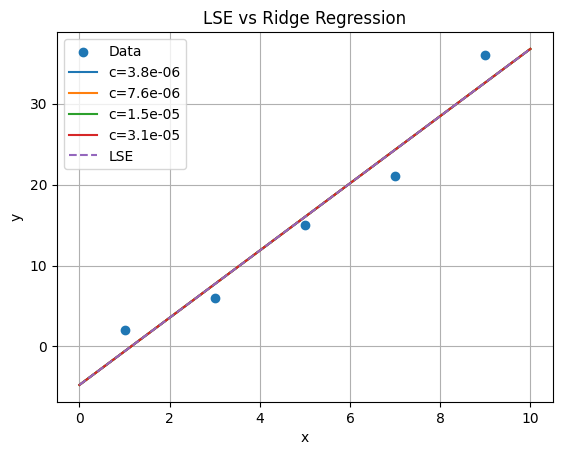

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Given data
x = np.array([1, 3, 5, 7, 9], dtype=float)
y = np.array([2, 6, 15, 21, 36], dtype=float)

# Design matrix
X = np.column_stack((np.ones(len(x)), x))

# ===== Ordinary Least Squares =====
theta_lse = np.linalg.inv(X.T @ X) @ X.T @ y
a_lse, b_lse = theta_lse

y_pred_lse = X @ theta_lse
rmse_lse = np.sqrt(np.mean((y - y_pred_lse) ** 2))

print("LSE Solution")
print("a =", a_lse, "b =", b_lse)
print("RMSE =", rmse_lse)

# ===== Ridge Regression =====
c_values = [2**-18, 2**-17, 2**-16, 2**-15]

plt.scatter(x, y, label="Data")

x_plot = np.linspace(0, 10, 100)

for c in c_values:
    theta_ridge = np.linalg.inv(X.T @ X + c * np.eye(2)) @ X.T @ y
    a_r, b_r = theta_ridge

    y_plot = a_r + b_r * x_plot
    y_pred = X @ theta_ridge
    rmse = np.sqrt(np.mean((y - y_pred) ** 2))

    print(f"\nRidge (c = {c})")
    print("a =", a_r, "b =", b_r)
    print("RMSE =", rmse)

    plt.plot(x_plot, y_plot, label=f"c={c:.1e}")

# LSE line
plt.plot(x_plot, a_lse + b_lse * x_plot, '--', label="LSE")

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("LSE vs Ridge Regression")
plt.grid(True)
plt.show()
